In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("/kaggle/input/glass/glass.csv")

In [3]:

df.shape

(214, 10)

In [4]:

df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:

df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:

df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [9]:

if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

In [10]:

df["y"] = (df["Type"] == 1).astype(int)


df = df.drop(columns=["Type"])

In [11]:

df['y'].value_counts()

y
0    144
1     70
Name: count, dtype: int64

In [12]:

X = df.drop(columns=["y"]).values
y = df["y"].values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (214, 9)
y shape: (214,)


In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

Train: 171 samples
Test: 43 samples


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
def sigmoid(z):

    return 1 / (1 + np.exp(-z))

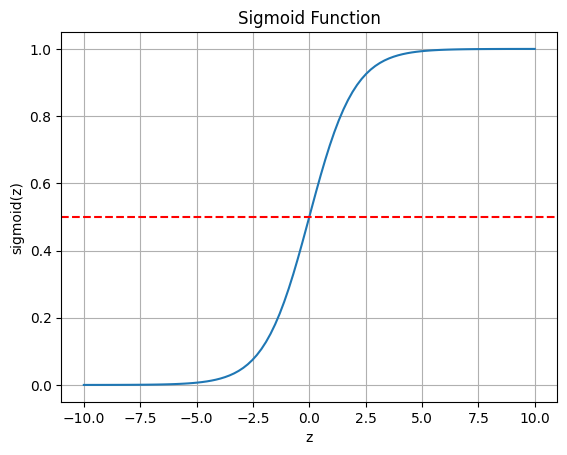

In [16]:

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.axhline(0.5, color='r', linestyle='--')
plt.show()

In [17]:
def predict_proba(X, w, b):
    z = X @ w + b

    p = sigmoid(z)
    return p

In [18]:
def loss(y, p):

    p = np.clip(p, 1e-10, 1 - 1e-10)
    
    return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

In [19]:
def update_weights(X, y, w, b, lr):

    p = predict_proba(X, w, b)
  
    error = p - y
  
    w = w - lr * (X.T @ error) / len(y)
    b = b - lr * np.mean(error)
    return w, b

In [20]:

w = np.zeros(X_train.shape[1])
b = 0.0
lr = 0.1
epochs = 100


losses = []

for epoch in range(epochs):
    w, b = update_weights(X_train, y_train, w, b, lr)
    current_loss = loss(y_train, predict_proba(X_train, w, b))
    losses.append(current_loss)
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss:.4f}")

Epoch 0: Loss = 0.6822
Epoch 20: Loss = 0.5748
Epoch 40: Loss = 0.5379
Epoch 60: Loss = 0.5184
Epoch 80: Loss = 0.5060


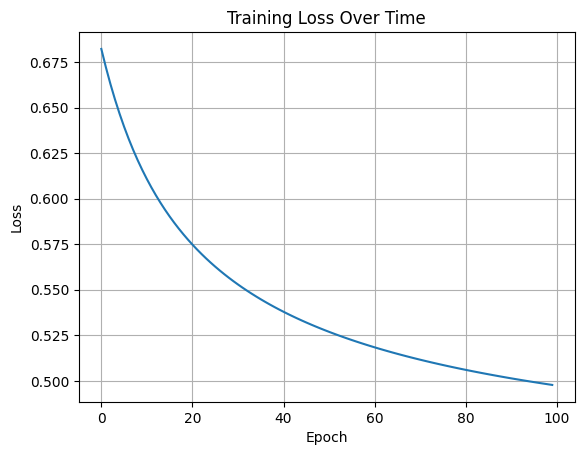

In [21]:

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

In [22]:
def predict_label(p, threshold=0.5):
    return (p >= threshold).astype(int)

In [23]:
p_test = predict_proba(X_test, w, b)

print("Sample probabilities:")
print(p_test[:10].round(3))

Sample probabilities:
[0.466 0.027 0.608 0.022 0.309 0.301 0.551 0.442 0.438 0.406]


In [24]:
y_pred_05 = predict_label(p_test, threshold=0.5)
accuracy_05 = np.mean(y_pred_05 == y_test)
print(f"Accuracy (threshold=0.5): {accuracy_05:.4f}")

Accuracy (threshold=0.5): 0.8605


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix (threshold=0.5):")
print(confusion_matrix(y_test, y_pred_05))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_05))

Confusion Matrix (threshold=0.5):
[[30  2]
 [ 4  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.78      0.64      0.70        11

    accuracy                           0.86        43
   macro avg       0.83      0.79      0.80        43
weighted avg       0.86      0.86      0.86        43



In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
sklearn_acc = clf.score(X_test, y_test)
print(f"Sklearn Accuracy: {sklearn_acc:.4f}")
print(f"Our Accuracy: {accuracy_05:.4f}")

Sklearn Accuracy: 0.8372
Our Accuracy: 0.8605



 How does this differ from perceptron?
- Perceptron outputs 0 or 1 (hard decision)
- Logistic regression outputs probability between 0 and 1 (soft decision)
- Perceptron uses step function, logistic uses sigmoid

 Why does sigmoid matter?
- Provides confidence level, not just yes/no
- Differentiable, so we can use gradient descent
- Preserves information about uncertainty

 What problem still remains unsolved?
- Non-linear decision boundaries (XOR problem)
- Multi-class classification (need extensions)
- Feature interactions not captured